# Installing libraries

In [2]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import requests

In [4]:
# Define paths for data and models
processed_data_path = 'Data\\processed_data\\'
live_data_path = 'Data\\Live_data\\'
models_path = 'Data\\models\\'
results_path = 'Data\\results\\'


# load train data

In [6]:
train_data = pd.read_csv(r'C:\Users\acer\Disaster_management_system\data\raw_data\train.csv')

In [7]:
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [8]:
# Load testing data
test_data = pd.read_csv(r'C:\Users\acer\Disaster_management_system\data\raw_data\test.csv')
print("Testing Data:")
print(test_data.head())

Testing Data:
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
# Load sample submission file (if needed)
sample_submission = pd.read_csv(r'C:\Users\acer\Disaster_management_system\data\raw_data\sample_submission.csv')
print("Sample Submission:")
print(sample_submission.head())

Sample Submission:
   id  target
0   0       0
1   2       0
2   3       0
3   9       0
4  11       0


# Exploratory Data Analysis (EDA)
Understand the data

In [11]:
print(train_data.info())  # Summary of data, including data types and missing values   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


In [12]:
print(train_data.describe())  # Statistical summary of numeric columns   

                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000


In [13]:
print(train_data.columns)  # List of columns in the dataset 

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')


# Visualize data

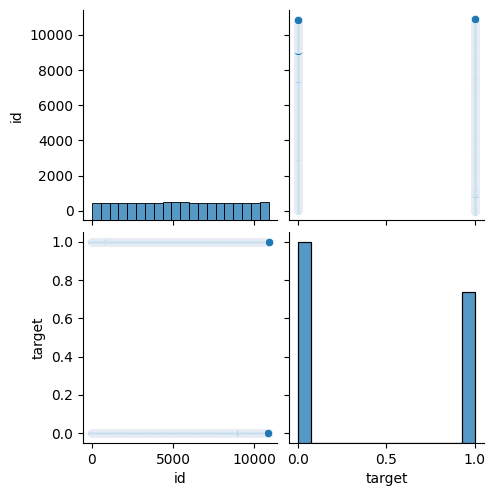

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train_data)
plt.show()

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns
numeric_columns = train_data.select_dtypes(include=['float64', 'int64'])
print(numeric_columns)

         id  target
0         1       1
1         4       1
2         5       1
3         6       1
4         7       1
...     ...     ...
7608  10869       1
7609  10870       1
7610  10871       1
7611  10872       1
7612  10873       1

[7613 rows x 2 columns]


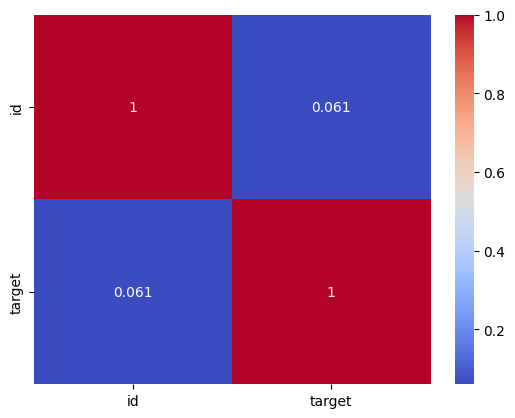

In [17]:
# Compute the correlation matrix ,annot har cell ke ander corr value ko display krta, cmp color scheme set krta
corr_matrix = numeric_columns.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Data Cleaning and Preprocessing

In [19]:
# handle missing values
train_data.isnull().sum()  # Check for missing values

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [20]:
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [21]:
# Drop the 'id' column from the train data
train_data = train_data.drop(columns=['id'])

In [22]:
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values with the mean of each numeric column
train_data[numeric_columns] = train_data[numeric_columns].fillna(train_data[numeric_columns].mean())

print("Missing values handled.")

Missing values handled.


In [23]:
# Handle missing values in categorical data,iloc mtlb aap rows column ko unke index number se accsess kr skte hai integer location base indexing
categorical_columns = train_data.select_dtypes(include=['object']).columns

# Fill missing values with the most frequent value
train_data[categorical_columns] = train_data[categorical_columns].fillna(train_data[categorical_columns].mode().iloc[0])

print("Categorical missing values handled.")

Categorical missing values handled.


In [24]:
# target column jisko humne predict krna hai 0 for no disaster 1 for disaster
train_data

,keyword,location,text,target
0,fatalities,USA,Our Deeds are the Reason of this #earthquake M...,1
1,fatalities,USA,Forest fire near La Ronge Sask. Canada,1
2,fatalities,USA,All residents asked to 'shelter in place' are ...,1
3,fatalities,USA,"13,000 people receive #wildfires evacuation or...",1
4,fatalities,USA,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,fatalities,USA,Two giant cranes holding a bridge collapse int...,1
7609,fatalities,USA,@aria_ahrary @TheTawniest The out of control w...,1
7610,fatalities,USA,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,fatalities,USA,Police investigating after an e-bike collided ...,1


In [25]:
train_data.isnull().sum()

keyword     0
location    0
text        0
target      0
dtype: int64

In [26]:
train_data['text'] = train_data['text'].str.lower()

In [27]:
train_data['text'] = train_data['text'].str.replace(r'[^\w\s]', '', regex=True)

# Test data cleaning

In [29]:
test_data

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [30]:
test_data = test_data.drop(columns=['id'])

In [31]:
test_data 

,keyword,location,text
0,NaN,NaN,Just happened a terrible car crash
1,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...
3258,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [32]:
test_data.isnull().sum()

keyword       26
location    1105
text           0
dtype: int64

In [33]:
test_data['text'] = test_data['text'].str.lower()

In [34]:
test_data['text'] = test_data['text'].str.replace(r'[^\w\s]', '', regex=True)

In [35]:
test_data

,keyword,location,text
0,NaN,NaN,just happened a terrible car crash
1,NaN,NaN,heard about earthquake is different cities sta...
2,NaN,NaN,there is a forest fire at spot pond geese are ...
3,NaN,NaN,apocalypse lighting spokane wildfires
4,NaN,NaN,typhoon soudelor kills 28 in china and taiwan
...,...,...,...
3258,NaN,NaN,earthquake safety los angeles ûò safety fasten...
3259,NaN,NaN,storm in ri worse than last hurricane my citya...
3260,NaN,NaN,green line derailment in chicago httptcoutbxlc...
3261,NaN,NaN,meg issues hazardous weather outlook hwo httpt...


In [36]:
# Handle missing values in categorical data,iloc mtlb aap rows column ko unke index number se accsess kr skte hai integer location base indexing
categorical_columns = test_data.select_dtypes(include=['object']).columns

# Fill missing values with the most frequent value
test_data[categorical_columns] = test_data[categorical_columns].fillna(test_data[categorical_columns].mode().iloc[0])

print("Categorical missing values handled.")

Categorical missing values handled.


In [37]:
test_data

,keyword,location,text
0,deluged,New York,just happened a terrible car crash
1,deluged,New York,heard about earthquake is different cities sta...
2,deluged,New York,there is a forest fire at spot pond geese are ...
3,deluged,New York,apocalypse lighting spokane wildfires
4,deluged,New York,typhoon soudelor kills 28 in china and taiwan
...,...,...,...
3258,deluged,New York,earthquake safety los angeles ûò safety fasten...
3259,deluged,New York,storm in ri worse than last hurricane my citya...
3260,deluged,New York,green line derailment in chicago httptcoutbxlc...
3261,deluged,New York,meg issues hazardous weather outlook hwo httpt...


In [38]:
# Example for saving processed train, test, and sample datasets

import os

processed_data_path ='C:\\Users\\acer\\Disaster_management_system\\Data\\processed_data\\'



def save_processed_data(df, processed_datafile):
    # Ensure the directory exists
    os.makedirs(processed_data_path, exist_ok=True)
    
    # Save the dataframe to the specified file path
    df.to_csv(f'{processed_data_path}{processed_datafile}', index=False)

# Process and Save Each Dataset
save_processed_data(train_data, 'processed_train_data.csv')
save_processed_data(test_data, 'processed_test_data.csv')
save_processed_data(sample_submission, 'processed_sample_submission.csv')


# Feature engineering

# Model Selection and Training:

In [41]:
#Frequency-Inverse Document Frequency (TF-IDF).
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor

categorical_columns = ['keyword', 'location']
text_column = 'text'
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


# Create the ColumnTransformer with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',  categorical_transformer, categorical_columns),
        ('text', TfidfVectorizer(), text_column)
    ],
    remainder='passthrough',  # Keep other columns as they are
    force_int_remainder_cols=False  # Use column names for remainder columns
)

# Create the model pipeline
pipeline  = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

In [42]:
# Separate features and target from train_data
from sklearn.model_selection import train_test_split

X = train_data.drop(columns=['target'])  # Features
Y = train_data['target']  # Target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [43]:
# Train the model
# Fit the pipeline on the entire training data
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['keyword', 'location']),
                                                 ('text', TfidfVectorizer(),
                                                  'text')])),
                ('model', RandomForestRegressor())])

In [44]:
# Save the new pipeline
pipeline_path = '../Data/models/pipeline.pkl'
joblib.dump(pipeline, pipeline_path)
print("Pipeline saved successfully.")

Pipeline saved successfully.


In [45]:
# Apply the transformations on the testing data without fitting again
transformed_test_data = pipeline.named_steps['preprocessor'].transform(test_data)

# If you need to make predictions on the test data:
predictions = pipeline.predict(test_data)

# Print the transformed test data or predictions
print(transformed_test_data)
print(predictions)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 41925 stored elements and shape (3263, 22380)>
  Coords	Values
  (0, 64)	1.0
  (0, 1728)	1.0
  (0, 5649)	0.4002151170722309
  (0, 6567)	0.3889857197293364
  (0, 9408)	0.5122104525603822
  (0, 14397)	0.312398316379726
  (0, 20408)	0.5732065196109617
  (1, 64)	1.0
  (1, 1728)	1.0
  (1, 3691)	0.23981648100324654
  (1, 6026)	0.41896501541580916
  (1, 7210)	0.37820859758202385
  (1, 7657)	0.31692212105164286
  (1, 8054)	0.30773754283000915
  (1, 9526)	0.32809898336165666
  (1, 14078)	0.16345110256023013
  (1, 18671)	0.41896501541580916
  (1, 19806)	0.34478357266477827
  (2, 64)	1.0
  (2, 1728)	1.0
  (2, 3753)	0.2945238415838614
  (2, 4000)	0.18944687252290401
  (2, 4291)	0.17095523926603642
  (2, 4441)	0.158188712166819
  (2, 5617)	0.3131555740605024
  :	:
  (3259, 22006)	0.315399147127859
  (3260, 64)	1.0
  (3260, 1728)	1.0
  (3260, 5917)	0.5236573578680094
  (3260, 7081)	0.45261412884501523
  (3260, 9200)	0.5178597204143847
  (

# predictions

Use the test data

In [48]:
# Apply transformations and make predictions directly on the test data
predictions = pipeline.predict(test_data)

# Print the predictions
print("Predictions:", predictions)

Predictions: [0.92 0.96 0.87 ... 0.99 0.48 0.27]


# Evaluation

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Y_test ke liye correct subset use karein
predictions = pipeline.predict(X_test)

# Ensure karein ki `Y_test` aur `predictions` ki length match karein
if len(Y_test) == len(predictions):
    mse = mean_squared_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
else:
    print("Y_test aur predictions ki length match nahi kar rahi hai.")


Mean Squared Error: 0.17849377126183275
R-squared: 0.2700943208506176


In [51]:
# prepare for submission

In [52]:
print(f"Predictions length: {len(predictions)}")
print(f"Sample submission length: {len(sample_submission)}")


Predictions length: 1523
Sample submission length: 3263


In [53]:
predictions = pipeline.predict(test_data)
predictions

array([0.92, 0.96, 0.87, ..., 0.99, 0.48, 0.27])

In [54]:
sample_submission['target'] = predictions
sample_submission.to_csv('submission.csv', index=False)

In [55]:
import os
import joblib

# Update this to the absolute path of your data/models directory
model_directory = 'C:/Users/acer/Disaster_management_system/Data/models'
model_filename = os.path.join(model_directory, 'trained_model.pkl')

# Create the directory if it doesn't exist
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

# Save the model
joblib.dump(pipeline, model_filename)
print(f"Model saved to {model_filename}")


Model saved to C:/Users/acer/Disaster_management_system/Data/models\trained_model.pkl


In [56]:
import os
import pandas as pd

# Path to save the predictions
results_dir = os.path.join('..', 'Data', 'results')  # Move up one directory from Notebooks to data/results
model_filename = os.path.join(results_dir, 'predictions.csv')

# Create the directory if it doesn't exist
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

# Assuming 'predictions' is your predictions array
predictions = pipeline.predict(X_test)

# Save predictions to a CSV file
result_df = pd.DataFrame(predictions, columns=['Prediction'])
result_df.to_csv(model_filename, index=False)
print(f"Predictions saved to '{model_filename}'")


Predictions saved to '..\Data\results\predictions.csv'


In [57]:
import os
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'Y_test' is the actual target values and 'predictions' are your model's predictions
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

# Absolute path to save the evaluation results
results_path = 'C:/Users/acer/Disaster_management_system/Data/results/model_evaluation.txt'

# Create the directory if it doesn't exist
results_dir = os.path.dirname(results_path)
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

# Save results to a file
with open(results_path, 'w') as f:
    f.write(f'MSE: {mse}\n')
    f.write(f'R²: {r2}\n')
print(f"Evaluation results saved to '{results_path}'")


Evaluation results saved to 'C:/Users/acer/Disaster_management_system/Data/results/model_evaluation.txt'


In [58]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [59]:
print(os.getcwd())

C:\Users\acer\OneDrive\Desktop\Disaster_management_system\Notebooks


In [60]:
import sys
import os
# Set the path to the src directory
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
sys.path.append(src_path)

# Fetch live data

In [62]:
import json
import requests
import os

# API key for OpenWeatherMap
api_key = 'd3437b12773eb0feaeba59084f496eeb'
city_name = 'India'
api_url = f'https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={api_key}'

# File path for saving live data
file_path = os.path.join('..', 'Data', 'Live_data', 'live_data.json')

# Fetch live data from OpenWeatherMap API
try:
    response = requests.get(api_url)
    if response.status_code == 200:
        live_data = response.json()  # Get the live data as JSON
        # Save the fetched data to the live_data.json file
        with open(file_path, 'w') as file:
            json.dump(live_data, file, indent=4)
        print("Live data fetched and saved successfully.")
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")
except Exception as e:
    print(f"An error occurred while fetching live data: {e}")

Live data fetched and saved successfully.


In [63]:
# Load the live data from the JSON file (after saving the new data)
if os.path.exists(file_path):
    print(f"File found at: {file_path}")
    try:
        with open(file_path, 'r') as file:
            live_data = json.load(file)
        print(live_data)  # Display the live data to check its contents
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"File not found at: {file_path}")


File found at: ..\Data\Live_data\live_data.json
{'coord': {'lon': 12.2797, 'lat': 46.7406}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 271.15, 'feels_like': 271.15, 'temp_min': 271.15, 'temp_max': 271.15, 'pressure': 1023, 'humidity': 93, 'sea_level': 1023, 'grnd_level': 862}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 0}, 'clouds': {'all': 97}, 'dt': 1732598527, 'sys': {'type': 1, 'id': 6809, 'country': 'IT', 'sunrise': 1732602551, 'sunset': 1732634866}, 'timezone': 3600, 'id': 3168508, 'name': 'Innichen', 'cod': 200}


# display live data

In [65]:
import json
import os

# Define the correct path to the JSON file
file_path = os.path.join('..', 'Data', 'Live_data', 'live_data.json')

# Check if file exists
if os.path.exists(file_path):
    print(f"File found at: {file_path}")
    
    # Load the live data from the JSON file
    try:
        with open(file_path, 'r') as file:
            live_data = json.load(file)
        print(live_data)  # Display the live data to check its contents
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"File not found at: {file_path}")


File found at: ..\Data\Live_data\live_data.json
{'coord': {'lon': 12.2797, 'lat': 46.7406}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 271.15, 'feels_like': 271.15, 'temp_min': 271.15, 'temp_max': 271.15, 'pressure': 1023, 'humidity': 93, 'sea_level': 1023, 'grnd_level': 862}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 0}, 'clouds': {'all': 97}, 'dt': 1732598527, 'sys': {'type': 1, 'id': 6809, 'country': 'IT', 'sunrise': 1732602551, 'sunset': 1732634866}, 'timezone': 3600, 'id': 3168508, 'name': 'Innichen', 'cod': 200}


# display extract information

In [67]:
# Extract specific data from the loaded JSON
city_name = live_data['name']
temperature = live_data['main']['temp'] - 273.15  # Convert Kelvin to Celsius
weather_description = live_data['weather'][0]['description']
wind_speed = live_data['wind']['speed']
humidity = live_data['main']['humidity']

# Display the extracted information
print(f"City: {city_name}")
print(f"Temperature: {temperature:.2f} °C")
print(f"Weather: {weather_description.capitalize()}")
print(f"Wind Speed: {wind_speed} m/s")
print(f"Humidity: {humidity}%")


City: Innichen
Temperature: -2.00 °C
Weather: Overcast clouds
Wind Speed: 1.03 m/s
Humidity: 93%


In [68]:
import pandas as pd

# Assuming the live_data contains weather information in a dictionary format
# Example: {'weather': [{'description': 'clear sky'}], 'main': {'temp': 293.15}}

# Extract relevant information
weather_description = live_data['weather'][0]['description']
temperature = live_data['main']['temp']

# Convert to a DataFrame (optional, for structured analysis)
df_live_data = pd.DataFrame([{
    'description': weather_description,
    'temperature': temperature
}])

# Display the DataFrame
print(df_live_data)


       description  temperature
0  overcast clouds       271.15


# visualize

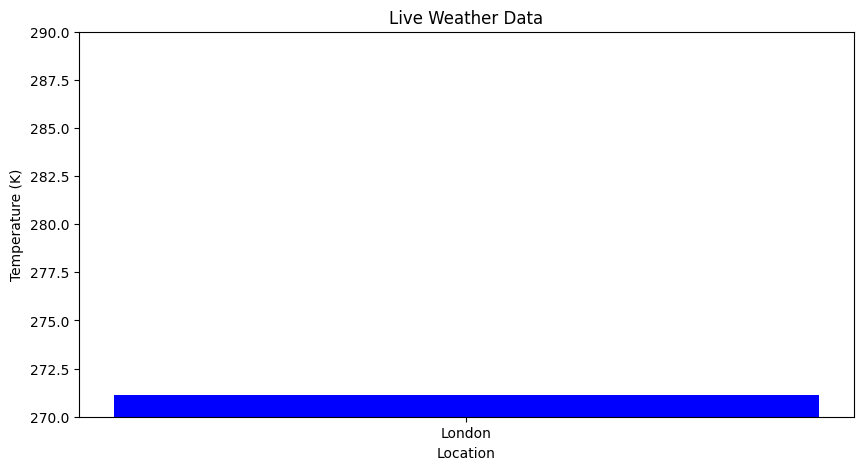

In [70]:
import matplotlib.pyplot as plt

# Plot the temperature
plt.figure(figsize=(10, 5))
plt.bar(['London'], [temperature], color='blue')
plt.xlabel('Location')
plt.ylabel('Temperature (K)')
plt.ylim(270, 290)  # Adjust y-axis range
plt.title('Live Weather Data')
plt.show()


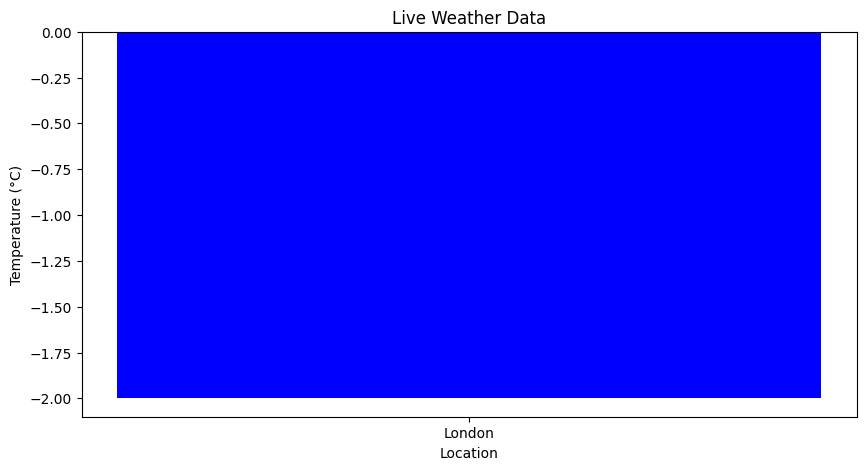

In [71]:
# Convert temperature from Kelvin to Celsius
temperature_celsius = temperature - 273.15

# Plot the temperature in Celsius
plt.figure(figsize=(10, 5))
plt.bar(['London'], [temperature_celsius], color='blue')
plt.xlabel('Location')
plt.ylabel('Temperature (°C)')
plt.title('Live Weather Data')
plt.show()


# To train and preprocess live data

In [73]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import json
import os

In [74]:
# Path to the saved model pipeline
model_path = '../Data/models/pipeline.pkl'

# Load the trained model pipeline
pipeline = joblib.load(model_path)

# Path to live data
file_path = os.path.join('..', 'Data', 'Live_data', 'live_data.json')

# Load and preprocess live data
if os.path.exists(file_path):
    try:
        with open(file_path, 'r') as file:
            live_data = json.load(file)
        
        # Extract relevant fields
        location = live_data.get('name', 'Unknown')
        keyword = live_data['weather'][0]['main'].lower()  # Dynamic keyword from weather condition
        text = f"The weather in {location} is {live_data['weather'][0]['description']}."
        
        # Create DataFrame for live data
        live_data_df = pd.DataFrame([{
            'keyword': keyword,
            'location': location,
            'text': text
        }])
        
        # Perform text cleaning if needed
        live_data_df['text'] = live_data_df['text'].str.lower()  # Convert text to lowercase
        live_data_df['text'] = live_data_df['text'].str.replace(r'[^\w\s]', '', regex=True)  # Remove punctuation

        print("Preprocessed live data:")
        print(live_data_df)
    
        # Use the pipeline to preprocess and make predictions
        live_data_processed = pipeline.named_steps['preprocessor'].transform(live_data_df)
        predictions = pipeline.named_steps['model'].predict(live_data_processed)
        
        # Save or display the predictions
        predictions_path = '../Data/processed_data/live_data_predictions.csv'
        pd.DataFrame(predictions, columns=['prediction']).to_csv(predictions_path, index=False)
        print("Live data processed and predictions saved successfully.")
    
    except FileNotFoundError:
        print(f"File not found at: {file_path}")
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
    except KeyError as e:
        print(f"KeyError: Missing expected field in the live data - {e}")
    except Exception as e:
        print(f"An error occurred during preprocessing: {e}")
else:
    print(f"File not found at: {file_path}")


Preprocessed live data:
  keyword  location                                        text
0  clouds  Innichen  the weather in innichen is overcast clouds
Live data processed and predictions saved successfully.


In [75]:
# Add predictions to the live data DataFrame
live_data_df['prediction'] = predictions

In [76]:
# Create a readable formatted string
formatted_output = f"Keyword: {live_data_df['keyword'][0]}\n" \
                   f"Location: {live_data_df['location'][0]}\n" \
                   f"Text: {live_data_df['text'][0]}\n" \
                   f"predictions: {live_data_df['prediction'][0]}\n"

print(formatted_output)

Keyword: clouds
Location: Innichen
Text: the weather in innichen is overcast clouds
predictions: 0.47



In [77]:
# Save the DataFrame with predictions to a CSV file
predictions_path = '../Data/processed_data/live_data_predictions.csv'
live_data_df.to_csv(predictions_path, index=False)

print(f"Predictions saved to {predictions_path}")


Predictions saved to ../Data/processed_data/live_data_predictions.csv


In [78]:
from tabulate import tabulate

# Add predictions to the DataFrame
live_data_df['prediction'] = predictions

# Create a readable table with predictions
table = tabulate(live_data_df, headers='keys', tablefmt='grid')
print("Live Data Predictions:")
print(table)


Live Data Predictions:
+----+-----------+------------+--------------------------------------------+--------------+
|    | keyword   | location   | text                                       |   prediction |
+====+===========+============+============================================+==============+
|  0 | clouds    | Innichen   | the weather in innichen is overcast clouds |         0.47 |
+----+-----------+------------+--------------------------------------------+--------------+


In [79]:
# Save the DataFrame to a CSV file with clear headers
output_path = '../Data/processed_data/live_data_output.csv'
live_data_df.to_csv(output_path, index=False, header=True)

print(f"Live data saved to {output_path}")


Live data saved to ../Data/processed_data/live_data_output.csv


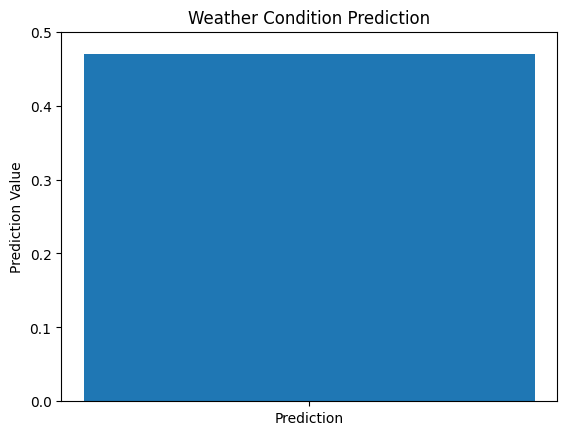

In [80]:
import matplotlib.pyplot as plt

plt.bar(['Prediction'], predictions)
plt.title('Weather Condition Prediction')
plt.ylabel('Prediction Value')
plt.ylim(0, 0.50)  # Set y-axis limit to make the small value visible
plt.show()


# Import function from idms_function.py file from vs code

In [82]:
#from src.idms_functions import clean_data, create_features, generate_alert, suggest_action, fetch_live_weather_data

# Example usage:
#df = pd.DataFrame({'existing_feature': [1, 2, 3]})
#df_cleaned = clean_data(df)
#df_features = create_features(df_cleaned)
#print(df_features)


In [83]:
import os
secret_key = os.urandom(24).hex()
print(secret_key)


2ff0f10ca48da888c9532159ebbcf6d62588ef448d2cadf3


In [84]:
import secrets
secrets.token_hex(16)  

'43c1e2e58a343f3c5da6761345715ac0'